In [1]:
from h5toolspy import H5Processor
from picplot import fieldGrid, histGrid
from adios2toolspy import Particles
import matplotlib
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['figure.figsize'] = [16, 8]
root = '/gpfs/alpine/proj-shared/fus137/johnd/flatfoil_summit_6-3/scalingUp'
cpp = 32
## species map is the enum identifier of each particle from the case file
#speciesMap = {'i_am':2 , 'i_tar':3, 'e_am':1, 'e_tar': 0, 'all': -1}

In [2]:
## list each field/moment you want to plot and time
## here we plot By ambient electron density and target electron density from time 0 and time 100
fieldGrid(root, ['hy_fc', 'rho_e_am', 'rho_e_tar'], [0, 100], zrange=(0,None), timeAveraged=False)
# h5p = H5Processor(root, timeAveraged=False)
# h5p.getH5Grid('rho_e_am', 0)
# h5p.attributes

FileNotFoundError: [Errno 2] No such file or directory: '/gpfs/alpine/proj-shared/fus137/johnd/flatfoil_summit_6-3/scalingUp/pfd.xdmf'

In [71]:
## path to checkpoint file
path = root + 'checkpoint_' + '30000' + '.bp'

In [72]:
## get patch coordinate information of particles, get particles from each patch as pandas dataframe
prts = Particles(path, speciesMap, species='all')
particles = []
for coord in prts.patchCoordinates:
    particles.append(prts.getPatch(coord, cpp))

In [73]:
allPrt = pd.concat(particles, ignore_index=True)

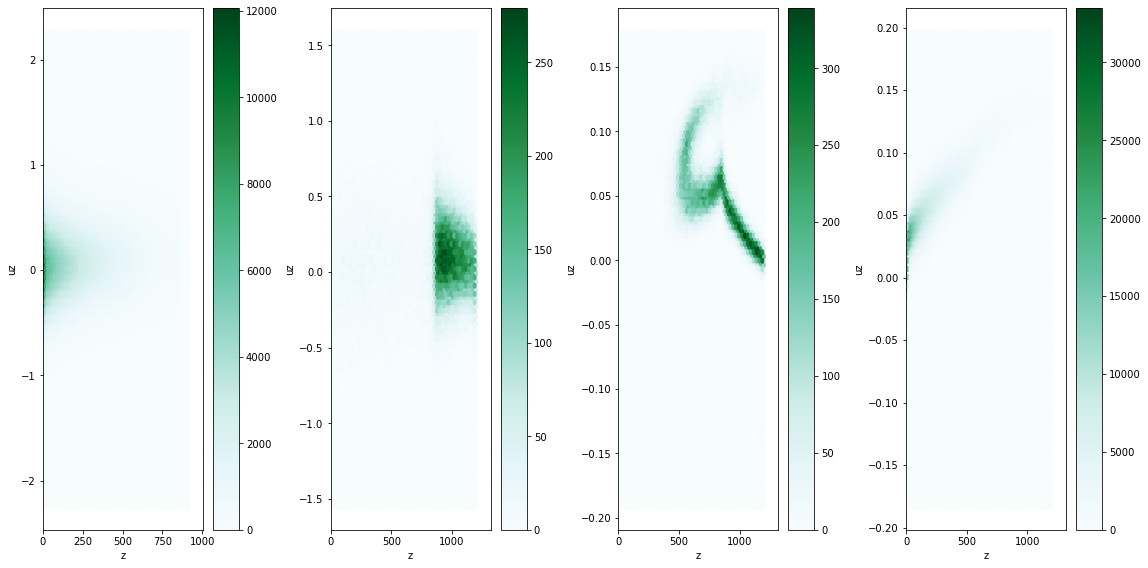

In [74]:
#speciesMap = {'i_am':2 , 'i_tar':3, 'e_am':1, 'e_tar': 0, 'all': -1}
fig, axes = plt.subplots(1,4)
for i, ax in enumerate(axes):
    allPrt[allPrt['kind']==i].plot.hexbin(x='z', y='uz', ax=ax)#, clim=(0,2000)
    ax.set_xlim(0,)

fig.tight_layout()